# Introduction to neural networks

## Neural networks and iris flowers

Many machine learning prediction problems are rooted in complex data and its non-linear relationships between features. Neural networks are a class of models that can learn these non-linear interactions between variables.<br>

We will introduce neural networks by predicting the species of iris flowers from data with the following features:

* `sepal_length` - Continuous variable measured in centimeters.
* `sepal_width` - Continuous variable measured in centimeters.
* `petal_length` - Continuous variable measured in centimeters.
* `petal_width` - Continuous variable measured in centimeters.
* `species` - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.

The DataFrame class includes a `hist()` method which creates a histogram for every numeric column in that DataFrame. The histograms are generated using [Matplotlib](http://matplotlib.org/api/pyplot_api.html) and displayed using `plt.show()`.

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read in dataset
iris = pandas.read_csv("data/iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())

    sepal_length  sepal_width  petal_length  petal_width          species
93           6.8          3.2           5.9          2.3   Iris-virginica
87           6.4          3.1           5.5          1.8   Iris-virginica
69           6.0          2.2           5.0          1.5   Iris-virginica
61           6.4          2.7           5.3          1.9   Iris-virginica
37           6.3          2.3           4.4          1.3  Iris-versicolor
['Iris-virginica' 'Iris-versicolor']


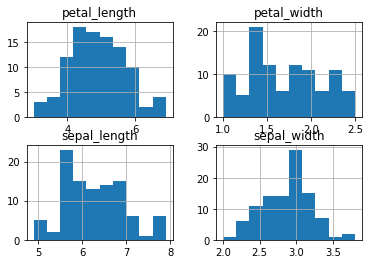

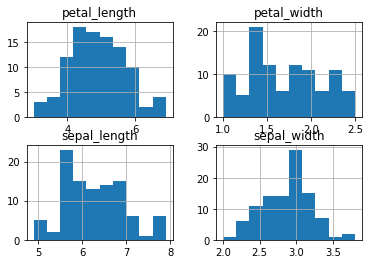

In [6]:
iris.hist();plt.show()

## Neurons

So far we have talked about methods which do not allow for a large amount of non-linearity. For example, in the two dimensional case shown below, we want to find a function that can cleanly separate the X's from the O's.

![https://dq-content.s3.amazonaws.com/l92oKZd.png](https://dq-content.s3.amazonaws.com/l92oKZd.png)

Neither a linear model nor logistic model is capable of building such a function, so we must explore other options like neural networks. Neural networks are very loosely inspired by the structure of neurons in the human brain. These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output. Below we see a representation of a neuron.

![https://dq-content.s3.amazonaws.com/RdPPxre.png](https://dq-content.s3.amazonaws.com/RdPPxre.png)

This neuron is taking in 5 units represented as `x`, a bias unit, and `4` features. This bias unit ($1$) is similar in concept to the intercept in linear regression and it will shift the activity of the neuron to one direction or the other. These units are then fed into an activation function `h`. We will use the popular sigmoid (logistic) activation function because it returns values between 0 and 1 and can be treated as probabilities.

$$\text{Sigmoid Function: }g(z) = \dfrac{1}{1 + e^{-z}}$$

This sigmoid function then leads to the corresponding activation function:

$$\text{Sigmoid Activation Function: }h_{\Theta}(x) = \dfrac{1}{1+e^{-\Theta^T x}} = \dfrac{1}{1+e^{-(\theta_01 + \theta_1x_1 + \theta_2 x_2)}}$$

If you look closely, you might notice that the logistic regression function we learned in previous lessons can be represented here as a neuron.

In [10]:
z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication
# z is 1x3 and y is 1x3,  z * y.T is then 1x1
print(np.dot(z,y.T))

# Variables to test sigmoid_activation
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]

# Initialize thetas randomly 
theta_init = np.random.normal(0,0.01,size=(5,1))

[[17]]


In [15]:
def sigmoid_activation(x0, theta_init):
    return (1 + np.exp(-(np.dot(theta_init.T, x0))))**(-1)
    
a1 = sigmoid_activation(x0, theta_init)
a1

array([ 0.50840791])

## Cost function

We can train a single neuron as a two layer network using gradient descent. As we learned in the previous mission, we need to minimize a cost function which measures the error in our model. The cost function measures the difference between the desired output and actual output, defined as:

$$J(\Theta) = -\dfrac{1}{m} \sum_{i=1}^{m} (y_i * log(h_{\Theta}(x_i)) + (1-y_i) log(1-h_{\Theta}(x_i)))$$

Since our targets, $y_i$, are binary, either $y_i$ or $(1−y_i)$ will equal zero. One of the terms in the summation will disappear because of this result and. the activation function is then used to compute the error. For example, if we observe a true target, $y_i=1$, then we want $h_{\Theta}(x_i)$ to also be close to $1$. So as $h_{\Theta}(x_i)$ approaches $1$, the $log(h_{\Theta}(x_i))$ becomes very close to 0. Since the log of a value between $0$ and $1$ is negative, we must take the negative of the entire summation to compute the cost. The parameters are randomly initialized using a normal random variable with a small variance, less than 0.1.

Write a function, `singlecost()`, that can compute the cost from just a single observation.
* This function should use input features `X`, targets `y`, and parameters `theta` to compute the cost function.
* Assign the cost of variables `x0`, `y0`, and `theta_init` to variable `first_cost`.